# locally Weighted Regression 
- 1.) Read and normalize the Dataset
- 2.) Generate W 
- 3.) No Training is required, make prediction directly
    (X.TWX).inv*(X.TWY)
- 4.) find the best value of tau(cross validation)


# Load Data

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
X=pd.read_csv('./DataSets/weightedX.csv').values
Y=pd.read_csv('./DataSets/weightedY.csv').values

print(X.shape)
print(Y.shape)

(99, 1)
(99, 1)


# Normalization

In [76]:
u=np.mean(X)
std=np.std(X)
X=(X-u)/std

In [77]:
plt.style.use("seaborn")

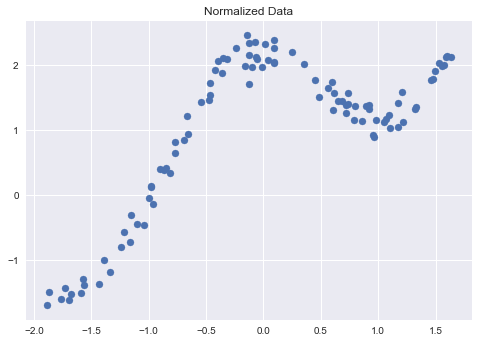

In [78]:
plt.title("Normalized Data")
plt.scatter(X,Y)
plt.show()

# GENERATE W

In [79]:
def getW(query_point,X,tau):
    M=X.shape[0]
    W=np.mat(np.eye(M))
    
    for i in range(M):
        W[i,i]=np.exp(np.dot((X[i]-query_point),(X[i]-query_point).T)/(-2*tau*tau))
        
    return W

In [80]:
X_=np.mat(X)
Y_=np.mat(Y)

# 3. Make Prediction

In [81]:
# add one row of 1 to x
ones=np.ones((X_.shape[0],1))
X_=np.hstack((X_,ones))
#print(X_)

In [82]:
def predict(X,Y,query_x,tau):
    qx=np.mat([query_x,1])
    W=getW(qx,X,tau)
    first=np.dot(np.dot(X.T,W),X)
    second=np.dot(np.dot(X.T,W),Y)
    theta=np.linalg.pinv(first)*second
    pred=np.dot(qx,theta)
    return pred

In [121]:
x=[-1.7,-1.5,-1.3,-1.1,-0.9,-0.7,-0.5,-0.3,0.0,0.3,0.5,0.8,1.0,1.2,1.4,1.5]
y=[]
for i in range(len(x)):
    y_=predict(X_,Y_,x[i],0.1)
    y.append(y_[0][0])
    


In [122]:
y=np.array(y)
print(y)

[[[-1.50582011]]

 [[-1.30090291]]

 [[-0.92210619]]

 [[-0.37618234]]

 [[ 0.26209303]]

 [[ 0.90986263]]

 [[ 1.55088951]]

 [[ 2.02911241]]

 [[ 2.15149237]]

 [[ 2.03025576]]

 [[ 1.67061703]]

 [[ 1.31762525]]

 [[ 1.15881632]]

 [[ 1.28053513]]

 [[ 1.62388918]]

 [[ 1.87272334]]]


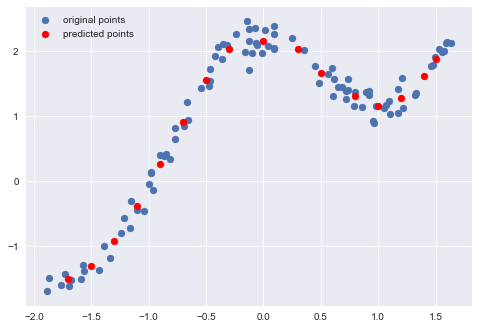

In [123]:
plt.scatter(X,Y,label='original points')
plt.scatter(x,y,color='red',label='predicted points')
plt.legend()
plt.show()

# 4. Visualisation

In [136]:
def plotpredicton(tau):
    X_test=np.linspace(-2,1.5,20)
    y_test=[]
    
    for qx in X_test :
        pred=predict(X_,Y_,qx,tau)
        y_test.append(pred[0][0])
    y_test=np.array(y_test)
    plt.title("Tau/Brandwidth param %.2f"%tau)
    plt.scatter(X,Y)
    plt.scatter(X_test,y_test,color='red')
    plt.show()

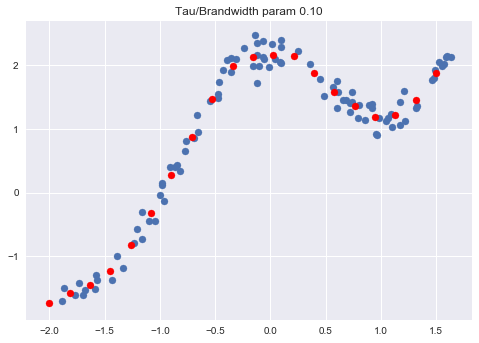

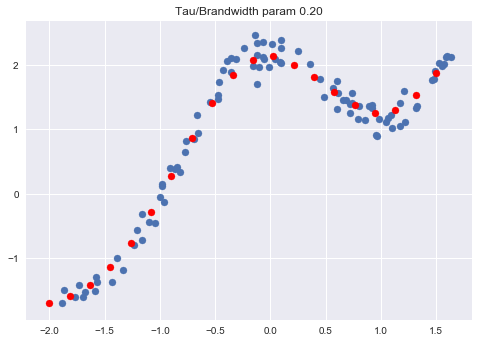

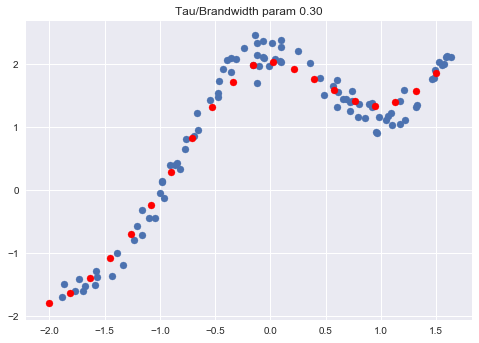

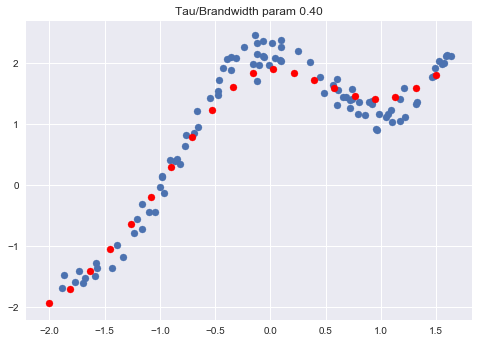

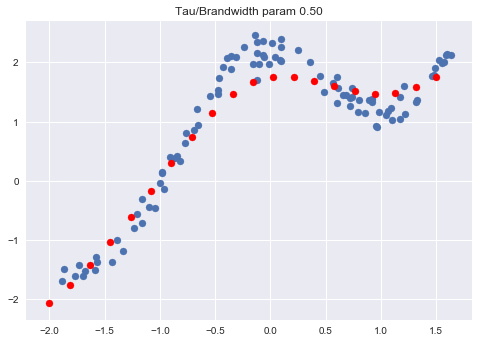

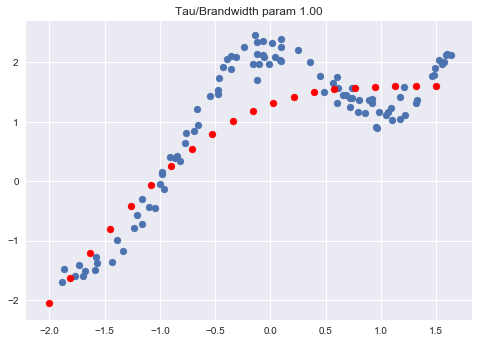

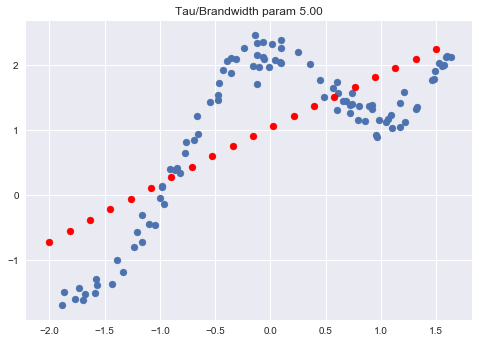

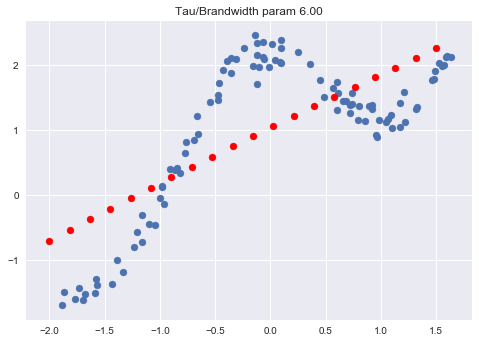

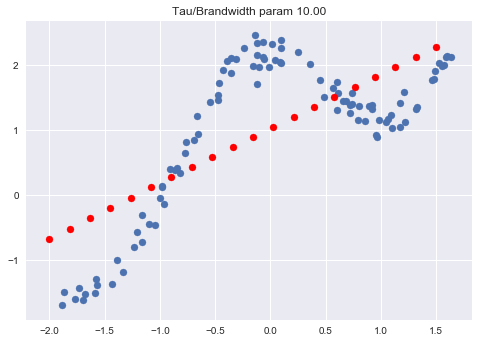

In [137]:
tau=[0.1,0.2,0.3,0.4,0.5,1,5,6,10]

for t in tau:
    plotpredicton(t)